# Investigating Fraudulent transactions in the Ethereum crypto-currency platform using Machine learning
Student Name : Navin Ravikumar

Student Number : 220011020

MSc Big Data Science with Machine Learning Systems

Queen Mary University of London

Project Supervisor: Professor Dr Mahesha Samaratunga


### Importing all the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix

### Installing the the scikit package

In [2]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the Dataset
This dataset contains 9841 rows of known fraud
and valid transactions made over Ethereum.

In [3]:
ether_data = pd.read_csv('/content/transaction_dataset.csv', index_col=0)
print(ether_data.shape)
ether_data.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


### Exploratory Data Analysis

In [4]:
# Understanding the Dataset
ether_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

In [5]:
#Checking Null Values
ether_data.isna().sum()

Index                                                     0
Address                                                   0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                            

In [6]:
#Finding the Number of unique values
for col in ether_data:print(f'{col} : {len(ether_data[col].unique())}')

Index : 4729
Address : 9816
FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx 

## Inspecting Variables
Analysing the Numerical and categorical variables to remove variables that are not useful for our learning process and can increase the efficency.

Inspecting the categorical variable

In [7]:
categories = ether_data.select_dtypes('O').columns.astype('category')
ether_data[categories]

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [8]:
#Frequency of Categorical Variables
ether_data[' ERC20 most sent token type'].value_counts()

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name:  ERC20 most sent token type, Length: 305, dtype: int64

In [9]:
ether_data[' ERC20_most_rec_token_type'].value_counts()

0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name:  ERC20_most_rec_token_type, Length: 467, dtype: int64

### Inspecting the number of unique values in varialbles

In [10]:
#Finding the Number of unique values
for col in ether_data:print(f'{col} : {len(ether_data[col].unique())}')

Index : 4729
Address : 9816
FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx 

In [11]:
#Finding the Number of unique values
for col in ether_data:print(f'{col} : {len(ether_data[col].unique())}')

Index : 4729
Address : 9816
FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx 

In [12]:
ether_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841

### Inspecting the Numerical variables

In [13]:
numerical_variables = ether_data.select_dtypes(include=['float','int']).columns
ether_data[numerical_variables].describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [14]:
#Finding the Variance of the Numericals
ether_data[numerical_variables].var()

Index                                                   1.494804e+06
FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                      

### Finding Correlation Matrix between Fraudulent Data and remaining features

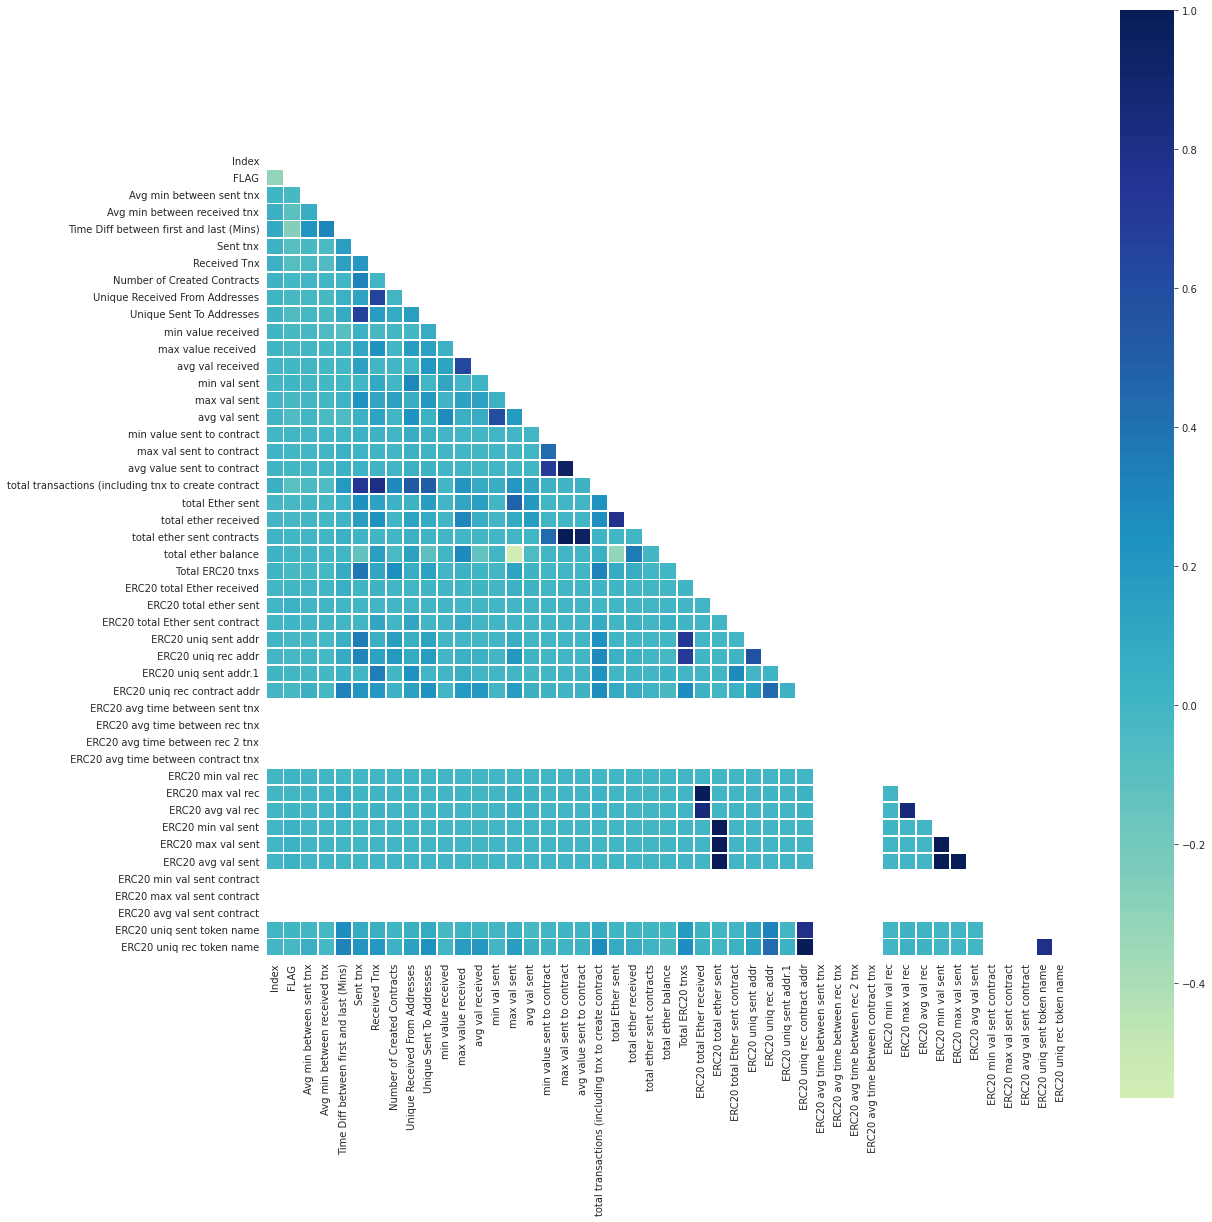

In [15]:
corr = ether_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

### Data Cleaning

In [16]:
#Dropping Index and Address columns are they are unique identifiers and not relevant to the problem
ether_data.drop(['Index','Address'],axis =1,inplace = True)

In [17]:
#Dropping the Categorical Columns as they are not relevant to problem.
ether_data.drop([' ERC20_most_rec_token_type',' ERC20 most sent token type'],axis =1,inplace = True)


In [18]:
# Replacing missing values columns with median
ether_data.fillna(ether_data.median(), inplace=True)

In [19]:
#Dropping the Numerical Columns as they reduce the performance of the model.
zero_variance = ether_data.var() == 0
print(ether_data.var()[zero_variance])

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64


In [20]:
ether_data.drop([' ERC20 avg time between sent tnx',' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx' ,' ERC20 avg time between contract tnx' ,' ERC20 min val sent contract', ' ERC20 max val sent contract', ' ERC20 avg val sent contract'],axis =1,inplace = True)

In [21]:
# Rechecking the variance
ether_data.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [22]:
ether_data_clean=  ether_data

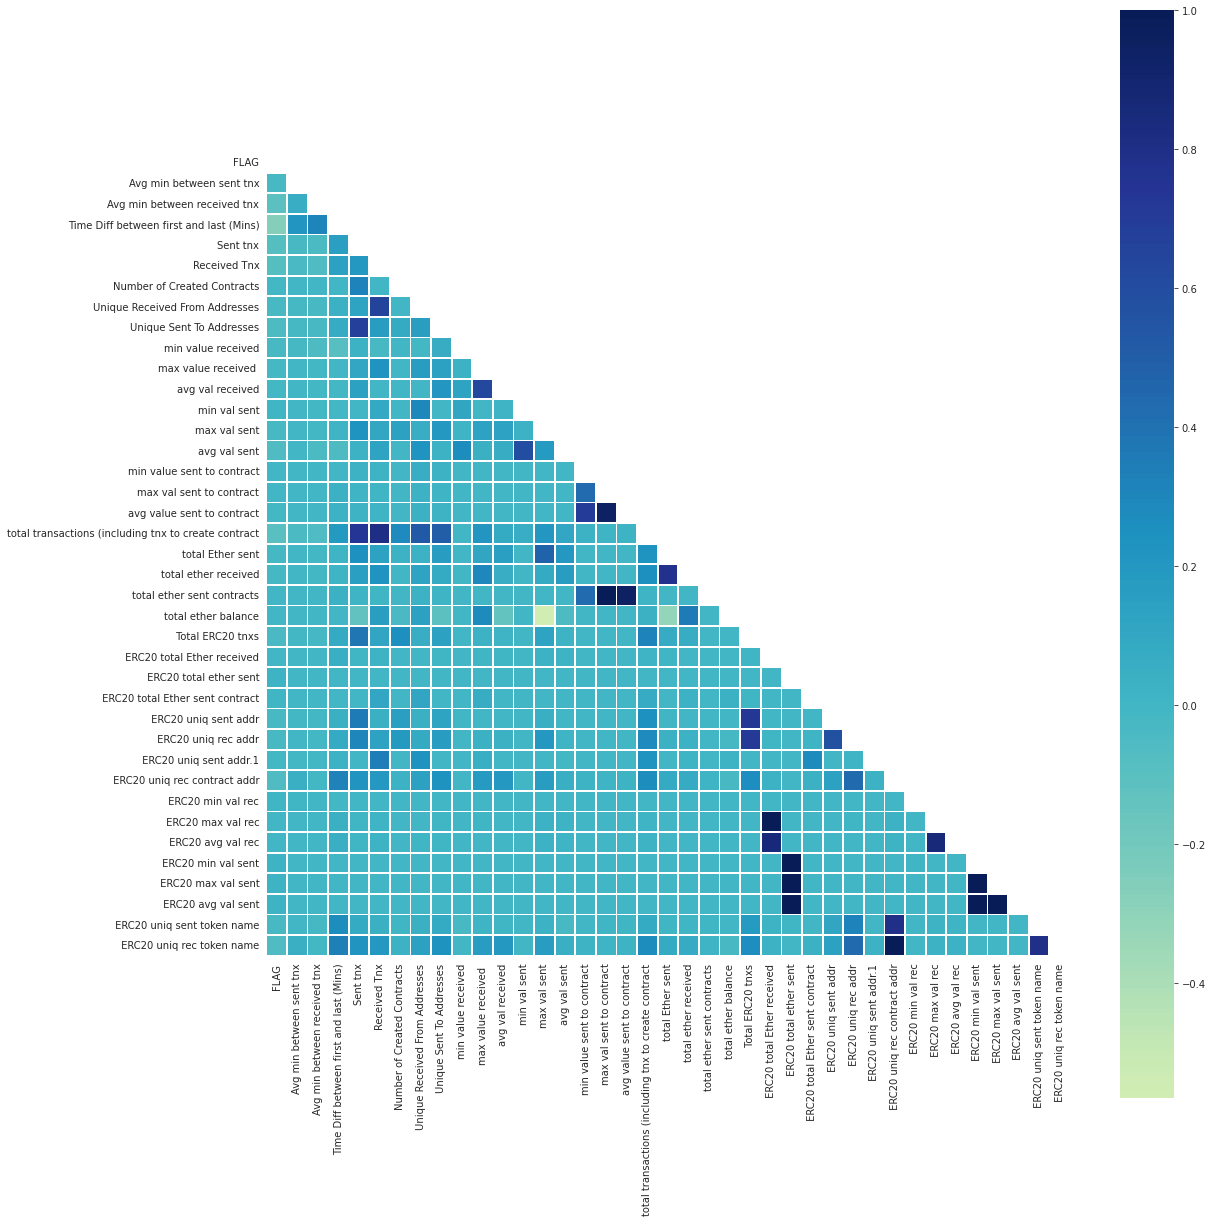

In [23]:
#Correlation Matrix after Data Cleaning
corr = ether_data_clean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

## Checking the imbalance of the Data set

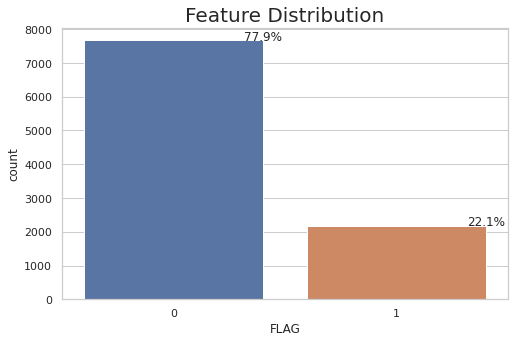

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(ether_data_clean))
ax = sns.countplot(x="FLAG", data=ether_data_clean)
plt.title('Feature Distribution', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

From the Above graph it is evident that there is an imbalance in our data

### Feature Selection

In [ ]:
drop = ['total transactions (including tnx to create contract', 'total ether sent contracts', 'max val sent to contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'avg value sent to contract', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
ether_data_clean.drop(drop, axis=1, inplace=True)

Rechecking the correlation matrix

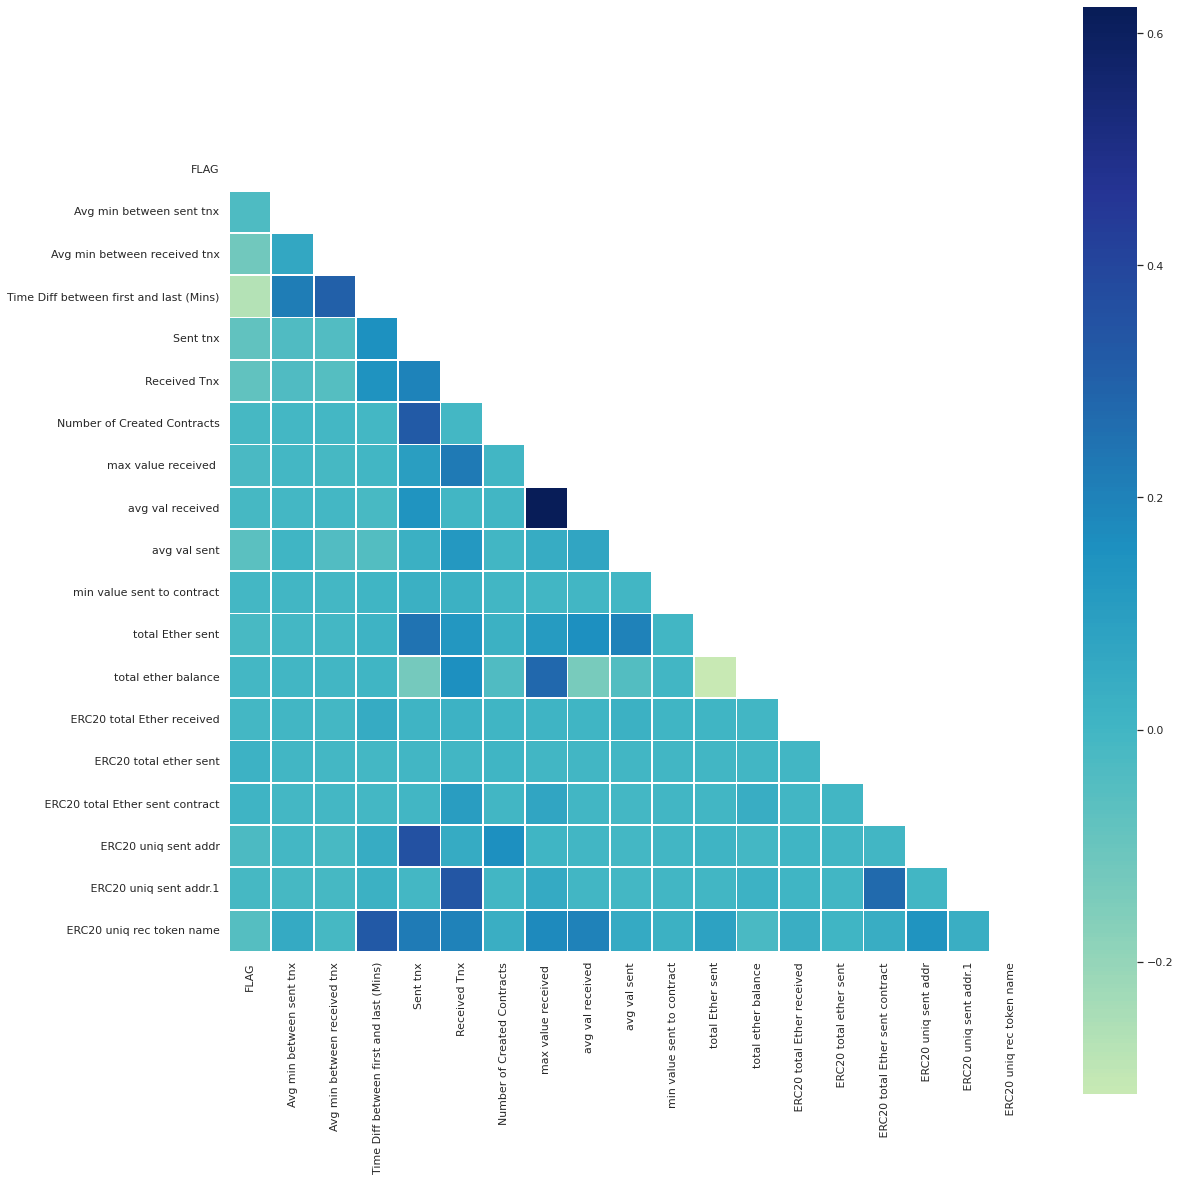

In [ ]:
corr = ether_data_clean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

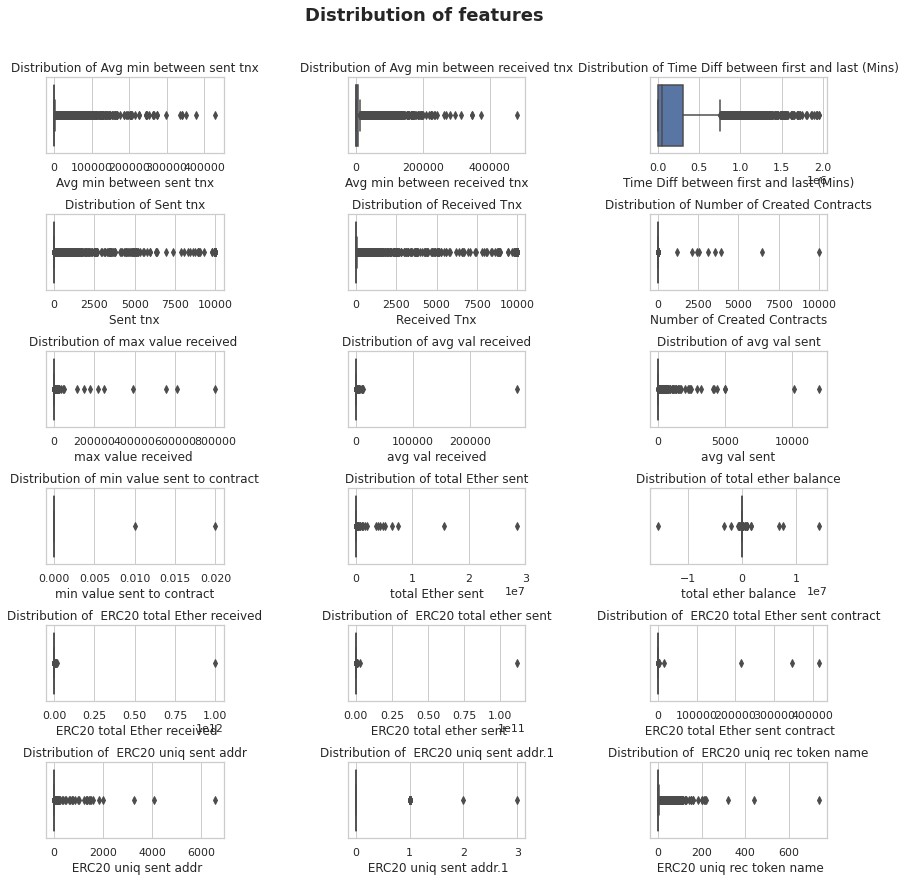

In [ ]:
# Feature Selection - Checking the Distribution of our features
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=ether_data_clean, x=ether_data_clean.columns[1])
ax.set_title(f'Distribution of {ether_data_clean.columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=ether_data_clean, x=ether_data_clean.columns[2])
ax1.set_title(f'Distribution of {ether_data_clean.columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=ether_data_clean, x=ether_data_clean.columns[3])
ax2.set_title(f'Distribution of {ether_data_clean.columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=ether_data_clean, x=ether_data_clean.columns[4])
ax3.set_title(f'Distribution of {ether_data_clean.columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=ether_data_clean, x=ether_data_clean.columns[5])
ax4.set_title(f'Distribution of {ether_data_clean.columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=ether_data_clean, x=ether_data_clean.columns[6])
ax5.set_title(f'Distribution of {ether_data_clean.columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=ether_data_clean, x=ether_data_clean.columns[7])
ax6.set_title(f'Distribution of {ether_data_clean.columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=ether_data_clean, x=ether_data_clean.columns[8])
ax7.set_title(f'Distribution of {ether_data_clean.columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=ether_data_clean, x=ether_data_clean.columns[9])
ax8.set_title(f'Distribution of {ether_data_clean.columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=ether_data_clean, x=ether_data_clean.columns[10])
ax9.set_title(f'Distribution of {ether_data_clean.columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=ether_data_clean, x=ether_data_clean.columns[11])
ax10.set_title(f'Distribution of {ether_data_clean.columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=ether_data_clean, x=ether_data_clean.columns[12])
ax11.set_title(f'Distribution of {ether_data_clean.columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=ether_data_clean, x=ether_data_clean.columns[13])
ax12.set_title(f'Distribution of {ether_data_clean.columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=ether_data_clean, x=ether_data_clean.columns[14])
ax13.set_title(f'Distribution of {ether_data_clean.columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=ether_data_clean, x=ether_data_clean.columns[15])
ax14.set_title(f'Distribution of {ether_data_clean.columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=ether_data_clean, x=ether_data_clean.columns[16])
ax15.set_title(f'Distribution of {ether_data_clean.columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=ether_data_clean, x=ether_data_clean.columns[17])
ax16.set_title(f'Distribution of {ether_data_clean.columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=ether_data_clean, x=ether_data_clean.columns[18])
ax17.set_title(f'Distribution of {ether_data_clean.columns[18]}')

plt.show()

From Visual Analysis it can be found that some features have very less distribution and have less influence in flagging a transaction as a Fraud or not. Thus these variables can be removed.

From the visual analysis and feature selection using random forest selection 'min value sent to contract', ' ERC20 uniq sent addr.1' have very small distribution

In [ ]:
drop = ['min value sent to contract', ' ERC20 uniq sent addr.1']
ether_data_clean.drop(drop, axis=1, inplace=True)


In [ ]:
print(ether_data_clean.shape)

(9841, 17)


## Data Preparation


### Handling the Imbalance



In [ ]:
y = ether_data_clean['FLAG']
X = ether_data_clean.iloc[:, 1:]
print(X.shape, y.shape)

(9841, 16) (9841,)


In [ ]:
# Splitting the data into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 16) (7872,)
(1969, 16) (1969,)


In [ ]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {X_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(X_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 16), (7872,))
Shape of the training after SMOTE: ((12262, 16), (12262,))


Rechecking Imbalance

In [ ]:
# Inspecting the target variable before and after oversampling
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFrauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFrauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 6131 
 	Frauds: 1741
AFTER OVERSAMPLING 
 	Non-frauds: 6131 
 	Frauds: 6132


## Training the Models using the training set

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
svm_classifier  = svm.SVC(C=1)
passiveAggressive = PassiveAggressiveClassifier()
randomforestclassifier = RandomForestClassifier(max_depth=14, random_state=45)

knearestclassifier.fit(x_tr_resample, y_tr_resample)
decisiontree.fit(x_tr_resample, y_tr_resample)
logisticregression.fit(x_tr_resample, y_tr_resample)
passiveAggressive.fit(x_tr_resample, y_tr_resample)
svm_classifier.fit(x_tr_resample,y_tr_resample)
randomforestclassifier.fit(x_tr_resample,y_tr_resample)


ether_data_clean = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier", 
                                       "Logistic Regression", "Passive Aggressive Classifier","svm_classifier","randomforestclassifier"],
      "Score": [knearestclassifier.score(X_test, y_test), decisiontree.score(X_test, y_test), 
                logisticregression.score(X_test, y_test), passiveAggressive.score(X_test, y_test),svm_classifier.score(X_test, y_test),randomforestclassifier.score(X_test, y_test) ]}
score = pd.DataFrame(ether_data_clean)
score


,Classification Algorithms,Score
0,KNN Classifier,0.856272
1,Decision Tree Classifier,0.954292
2,Logistic Regression,0.758761
3,Passive Aggressive Classifier,0.605383
4,svm_classifier,0.228035
5,randomforestclassifier,0.973083


## Findings 1
### The best performing models
The Best Performing model is Random Forest Classifier, Decision Tree Classifier and KNN Classifier

In [ ]:
#Random Forest Classifier
rf_yt_p1 = randomforestclassifier.predict(x_tr_resample)
rf_yv_p1 = randomforestclassifier.predict(X_test)
Xrf =np.mean(rf_yt_p1==y_tr_resample)
yrf =  np.mean(rf_yv_p1==y_test)             
print('Training Accuracy',Xrf )
print('Validation  Accuracy',yrf)


Training Accuracy 0.997961180884032
Validation  Accuracy 0.973082783138649


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1531
           1       0.94      0.94      0.94       438

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969



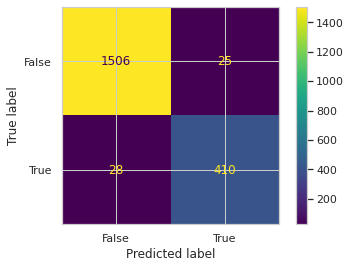

In [ ]:
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_yv_p1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print(classification_report(y_test, rf_yv_p1))
cm_display.plot()
plt.show()

In [ ]:
#KNN Classifier
knn_yt_p1 = knearestclassifier.predict(x_tr_resample)
knn_yv_p1 = knearestclassifier.predict(X_test)
Xknn =np.mean(knn_yt_p1==y_tr_resample)
yknn =  np.mean(knn_yv_p1==y_test)             
print('Training Accuracy',Xknn )
print('Validation  Accuracy',yknn)

Training Accuracy 0.9297830696460611
Validation  Accuracy 0.856272219400711


              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1531
           1       0.63      0.83      0.71       438

    accuracy                           0.85      1969
   macro avg       0.79      0.84      0.81      1969
weighted avg       0.87      0.85      0.86      1969



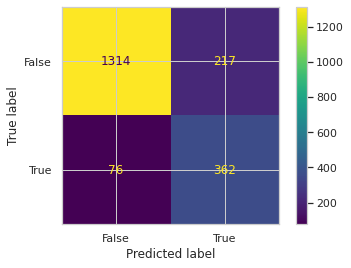

In [ ]:
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, knn_yv_p1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print(classification_report(y_test, knn_yv_p1))
cm_display.plot()
plt.show()

In [ ]:
#Decision Tree Classifier
dt_yt_p1 = decisiontree.predict(x_tr_resample)
dt_yv_p1 = decisiontree.predict(X_test)
Xdt =np.mean(dt_yt_p1==y_tr_resample)
ydt =np.mean(dt_yv_p1==y_test)             
print('Training Accuracy',Xdt )
print('Validation  Accuracy',ydt)

Training Accuracy 1.0
Validation  Accuracy 0.95733875063484


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1531
           1       0.90      0.92      0.91       438

    accuracy                           0.96      1969
   macro avg       0.94      0.94      0.94      1969
weighted avg       0.96      0.96      0.96      1969



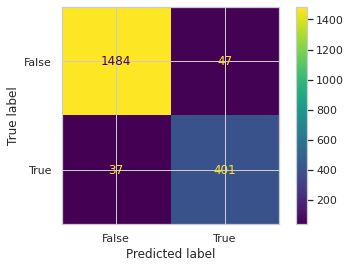

In [ ]:
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, dt_yv_p1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print(classification_report(y_test, dt_yv_p1))
cm_display.plot()
plt.show()

## Findings 2
### The worst performing model
The Wrost Performing model is SVM. Normalizing the input data could improve the accuracy of the model.

In [ ]:
mean = x_tr_resample.mean(0)
sd =  x_tr_resample.std(0)

x_tr_resample_norm = (x_tr_resample-mean)/sd
X_test_norm  = (X_test-mean)/sd

svm_classifier  = svm.SVC(C=1,gamma=2)
svm_classifier.fit(x_tr_resample_norm,y_tr_resample)

svm_yt_p = svm_classifier.predict(x_tr_resample_norm)
svm_yv_p = svm_classifier.predict(X_test_norm)
Xsvm = np.mean(svm_yt_p==y_tr_resample)
ysvm = np.mean(svm_yv_p==y_test)        
print('Training Accuracy', Xsvm)
print('Validation  Accuracy',ysvm)
print('The support vectors are', svm_classifier.support_vectors_.shape)

Training Accuracy 0.9421790898711466
Validation  Accuracy 0.9319451498222447
The support vectors are (3316, 16)


              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1531
           1       0.81      0.90      0.85       438

    accuracy                           0.93      1969
   macro avg       0.89      0.92      0.91      1969
weighted avg       0.94      0.93      0.93      1969



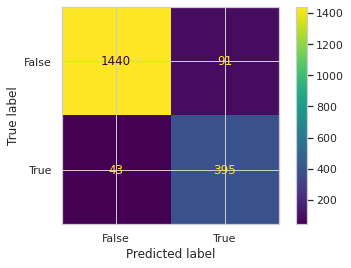

In [ ]:
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, svm_yv_p)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print(classification_report(y_test, svm_yv_p))
cm_display.plot()
plt.show()

## Findings 3
### Hyper-parameter tuning for the best performing model.
Random Forest model

In [ ]:
#Hyperparameter values currently in use
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(randomforestclassifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#building Parameter Grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = randomforestclassifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_tr_resample, y_tr_resample)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [49]:
best_grid = grid_search.best_estimator_
pprint(best_grid)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=45)


In [50]:
rf_yt_p2 = best_grid.predict(x_tr_resample)
rf_yv_p2 = best_grid.predict(X_test)
Xrfg2 =np.mean(rf_yt_p2==y_tr_resample)
yrfg2 =  np.mean(rf_yv_p2==y_test)             
print('Training Accuracy',Xrfg2)
print('Validation  Accuracy',yrfg2)


Training Accuracy 0.9951068341216768
Validation  Accuracy 0.973082783138649


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1531
           1       0.94      0.94      0.94       438

    accuracy                           0.97      1969
   macro avg       0.96      0.96      0.96      1969
weighted avg       0.97      0.97      0.97      1969



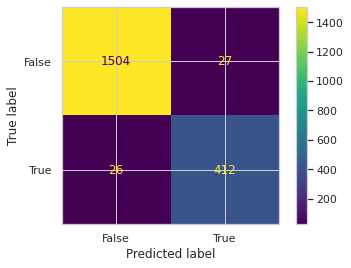

In [51]:
import numpy
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_yv_p2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print(classification_report(y_test, rf_yv_p2))
cm_display.plot()
plt.show()

## Findings 4
### Finding the best features Using Randomn Tree Classifier

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

Y = ether_data_clean['FLAG']
X = ether_data_clean.iloc[:,1:]
X_train, val_X, y_train, val_y = train_test_split(X, Y, random_state=1)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

sel.get_support()
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Received Tnx',
       'max value received ', 'avg val received',
       ' ERC20 total Ether received', ' ERC20 uniq rec token name'],
      dtype='object')
